<a href="https://colab.research.google.com/github/zmiern/ie423/blob/main/final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IE 423-01 Summer 2024 FINAL
###Name: Azmi Eren Acar
###ID: 21702991
###Task: Your task will be to predict whether a visitor to an online shopping website will make a purchase based on various features of their visit (The target variable is Revenue).


##0. Initial Steps:

* Importing libraries.

* Load Data.


In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [2]:
#Load Data
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/online_shoppers_intention.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Exploratory Data Analysis (EDA):

* Summarize the dataset.

* Visualize distributions of variables.

* Identify correlations between variables.

### * Summarize the dataset.

In [3]:
# Display the first few rows
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [4]:
# Display summary information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# Display basic statistical details
print(data.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

### * Visualize distributions of variables.

We will check each column one-by-one to have a better understanding. While going over, we will also do some implementations.

In [6]:
#Revenue (Class label: True if the visitor made a purchase, False otherwise, to be predicted)
column_name = 'Revenue'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'Revenue': [False  True]
Data type of 'Revenue': bool


We drop the 'Revenue' column which has boolen values. We introduced a new column 'Revenue_encoded' that has integer values [0,1]

In [7]:
label_encoder = LabelEncoder()
data['Revenue_encoded'] = label_encoder.fit_transform(data['Revenue'])
column_name = 'Revenue_encoded'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype
print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")
data = data.drop('Revenue', axis=1)

Unique values in 'Revenue_encoded': [0 1]
Data type of 'Revenue_encoded': int64


In [8]:
#Administrative (Number of pages visited by the visitor about account management)
column_name = 'Administrative'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'Administrative': [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Data type of 'Administrative': int64


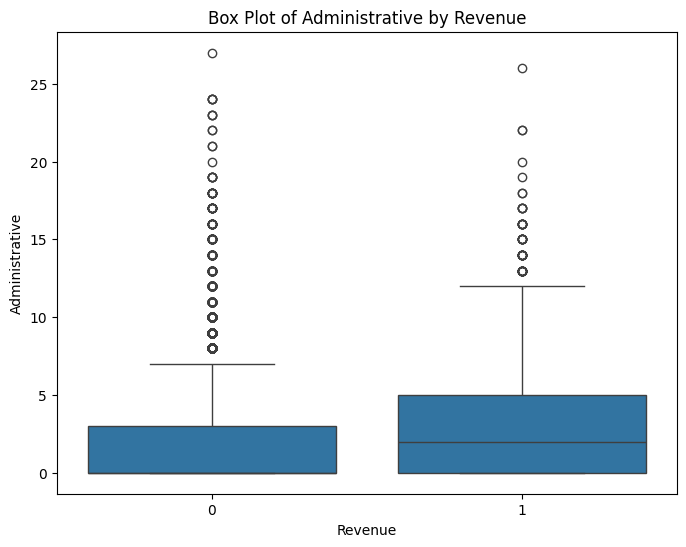

Point Biserial Correlation: 0.13891709415067258
P-value: 3.5197598377762157e-54


In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue_encoded', y='Administrative', data=data)
plt.title('Box Plot of Administrative by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Administrative')
plt.show()

correlation, p_value = pointbiserialr(data['Administrative'], data['Revenue_encoded'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

In [10]:
#Administrative_Duration (Total amount of time spent on account management-related pages)
column_name = 'Administrative_Duration'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'Administrative_Duration': [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Data type of 'Administrative_Duration': float64


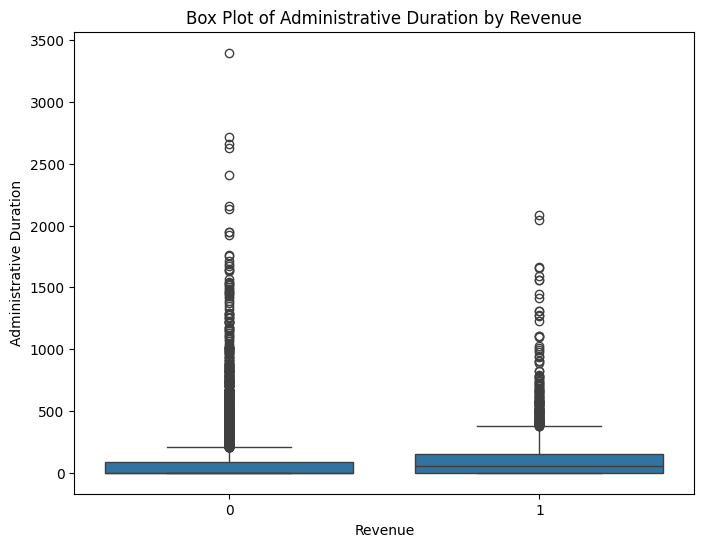

Point Biserial Correlation: 0.09358671905704188
P-value: 2.146513634744139e-25


In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue_encoded', y='Administrative_Duration', data=data)
plt.title('Box Plot of Administrative Duration by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Administrative Duration')
plt.show()

correlation, p_value = pointbiserialr(data['Administrative_Duration'], data['Revenue_encoded'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

In [12]:
#Informational (Number of pages visited by the visitor about Web site, communication, and transaction information)
column_name = 'Informational'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")



Unique values in 'Informational': [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Data type of 'Informational': int64


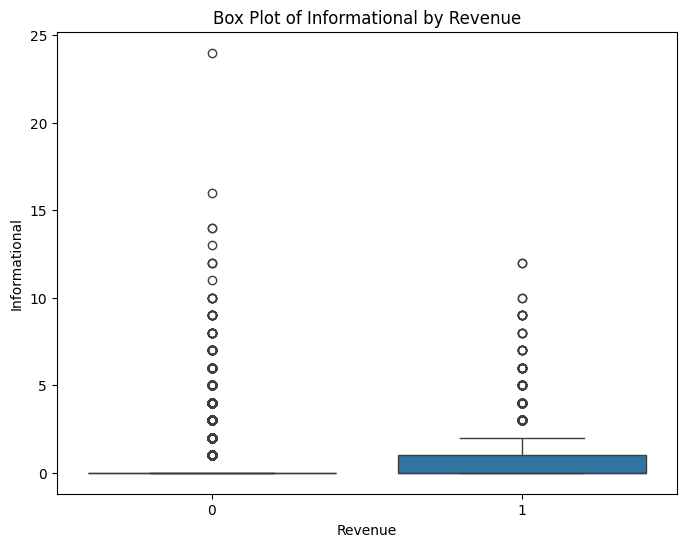

Point Biserial Correlation: 0.09520034257205695
P-value: 3.1740343112637484e-26


In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue_encoded', y='Informational', data=data)
plt.title('Box Plot of Informational by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Informational')
plt.show()

correlation, p_value = pointbiserialr(data['Informational'], data['Revenue_encoded'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

In [14]:
#Informational_Duration (Total amount of time spent on informational-related pages)
column_name = 'Informational_Duration'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'Informational_Duration': [  0.   120.    16.   ... 547.75 368.25 211.25]
Data type of 'Informational_Duration': float64


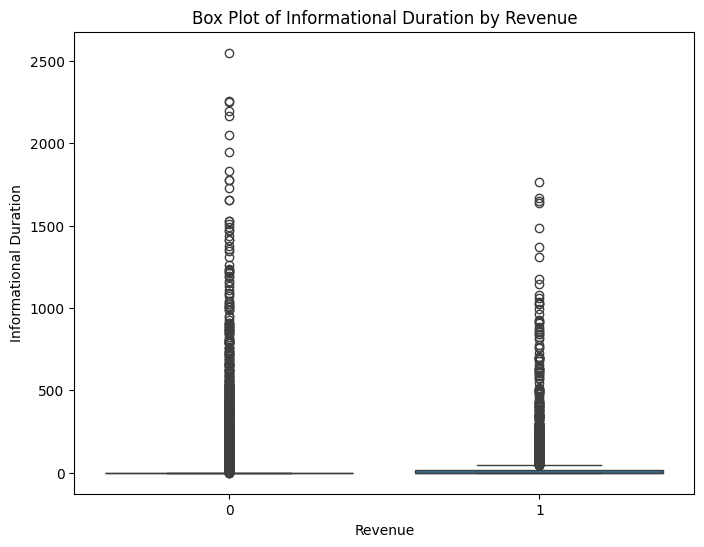

Point Biserial Correlation: 0.07034450234598348
P-value: 5.2828708607211676e-15


In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue_encoded', y='Informational_Duration', data=data)
plt.title('Box Plot of Informational Duration by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Informational Duration')
plt.show()

correlation, p_value = pointbiserialr(data['Informational_Duration'], data['Revenue_encoded'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

In [16]:
#ProductRelated (Number of pages visited by the visitor about product-related information)
column_name = 'ProductRelated'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'ProductRelated': [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195  99 362
 179 118 175 148 440 103 178 184 705 134 176 146 189 120 193 222 121 107
 305 199 439 223 230 280 377 310 158 486 153 139 182 221 229 216 170 202
 346 274 240 162 123 211 227 168 161 429 686 167 518 256 255 358 213 191
 282 155 138 246 237 271 171 414 219 262 409 243 241 197 449 143 188 391
 238 152 165 293

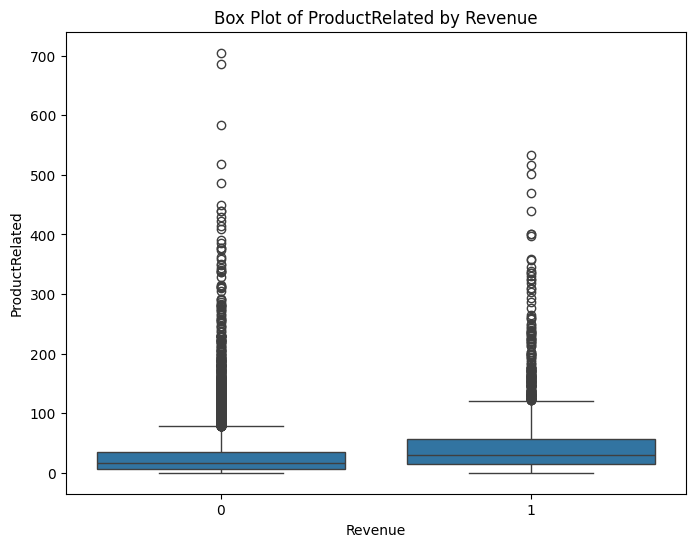

Point Biserial Correlation: 0.1585379842808748
P-value: 3.2411873289219516e-70


In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue_encoded', y='ProductRelated', data=data)
plt.title('Box Plot of ProductRelated by Revenue')
plt.xlabel('Revenue')
plt.ylabel('ProductRelated')
plt.show()

correlation, p_value = pointbiserialr(data['ProductRelated'], data['Revenue_encoded'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

In [18]:
#ProductRelated_Duration (Total amount of time spent on product-related pages)
column_name = 'ProductRelated_Duration'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'ProductRelated_Duration': [  0.          64.           2.66666667 ... 465.75       184.25
 346.        ]
Data type of 'ProductRelated_Duration': float64


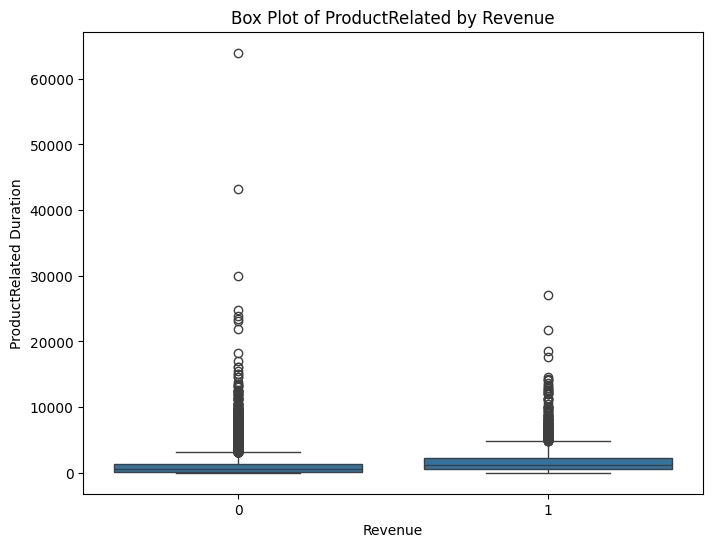

Point Biserial Correlation: 0.15237261055701037
P-value: 6.115338253466188e-65


In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue_encoded', y='ProductRelated_Duration', data=data)
plt.title('Box Plot of ProductRelated by Revenue')
plt.xlabel('Revenue')
plt.ylabel('ProductRelated Duration')
plt.show()

correlation, p_value = pointbiserialr(data['ProductRelated_Duration'], data['Revenue_encoded'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

In [20]:
#BounceRates (The percentage of visitors who enter the site from that page and then leave without triggering any other requests)
column_name = 'BounceRates'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'BounceRates': [0.2        0.         0.05       ... 0.00382775 0.00086956 0.01114899]
Data type of 'BounceRates': float64


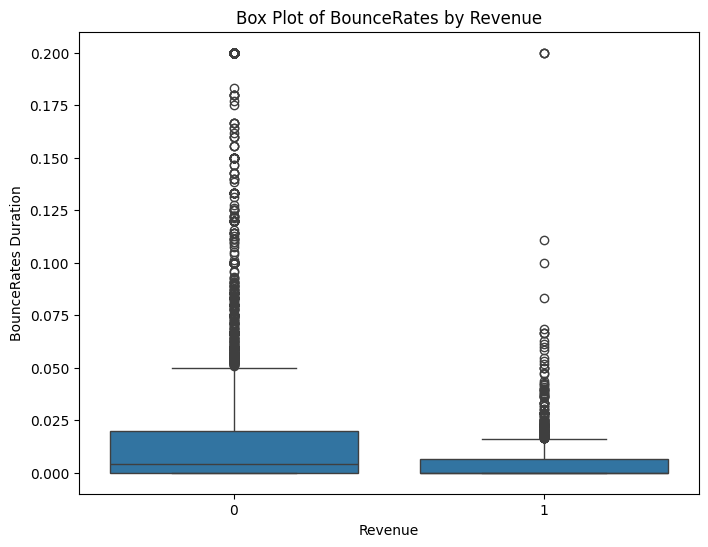

Point Biserial Correlation: -0.1506729119260537
P-value: 1.5941975385171387e-63


In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue_encoded', y='BounceRates', data=data)
plt.title('Box Plot of BounceRates by Revenue')
plt.xlabel('Revenue')
plt.ylabel('BounceRates Duration')
plt.show()

correlation, p_value = pointbiserialr(data['BounceRates'], data['Revenue_encoded'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")


In [22]:
#ExitRates (The percentage of pageviews on the site that were the last in the session)
column_name = 'ExitRates'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'ExitRates': [0.2        0.1        0.14       ... 0.01276133 0.01395349 0.02903061]
Data type of 'ExitRates': float64


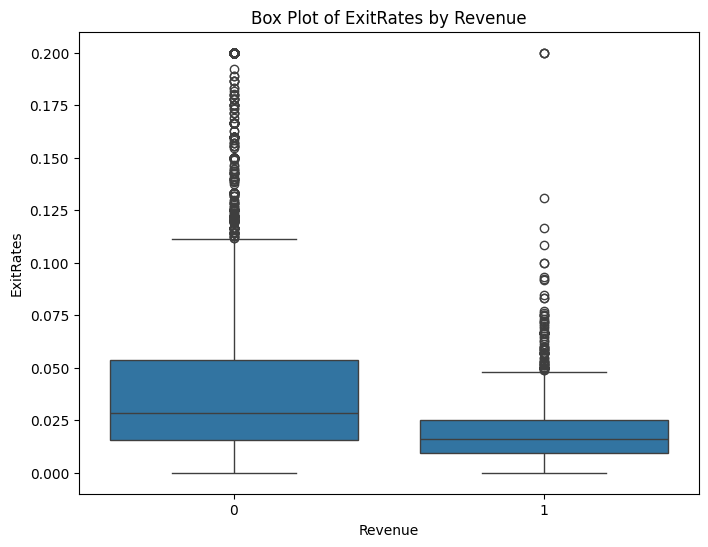

Point Biserial Correlation: -0.20707108205527186
P-value: 1.6626536250725168e-119


In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue_encoded', y='ExitRates', data=data)
plt.title('Box Plot of ExitRates by Revenue')
plt.xlabel('Revenue')
plt.ylabel('ExitRates')
plt.show()

correlation, p_value = pointbiserialr(data['ExitRates'], data['Revenue_encoded'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

In [24]:
#PageValues (The average value for a web page that a user visited before completing an e-commerce transaction)
column_name = 'PageValues'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'PageValues': [ 0.         54.17976426 19.44707913 ... 78.81172527  3.68540082
 12.24171745]
Data type of 'PageValues': float64


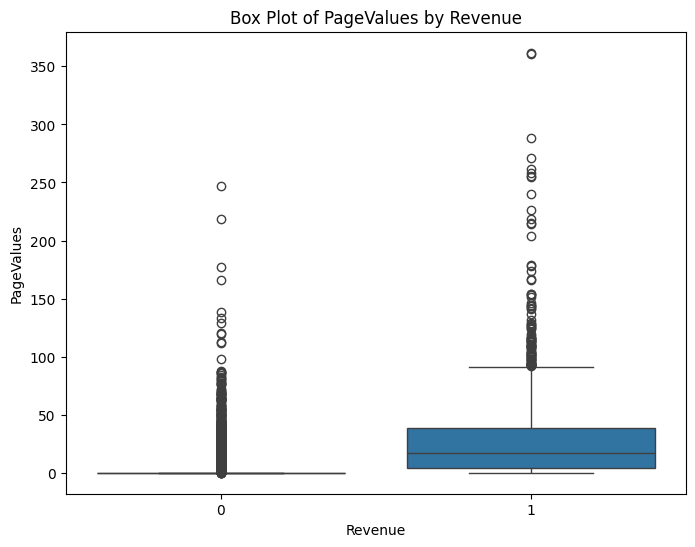

Point Biserial Correlation: 0.4925692952512095
P-value: 0.0


In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue_encoded', y='PageValues', data=data)
plt.title('Box Plot of PageValues by Revenue')
plt.xlabel('Revenue')
plt.ylabel('PageValues')
plt.show()

correlation, p_value = pointbiserialr(data['PageValues'], data['Revenue_encoded'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")


In [26]:
#SpecialDay (Closeness of the site visiting time to a special day)
column_name = 'SpecialDay'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'SpecialDay': [0.  0.4 0.8 1.  0.2 0.6]
Data type of 'SpecialDay': float64


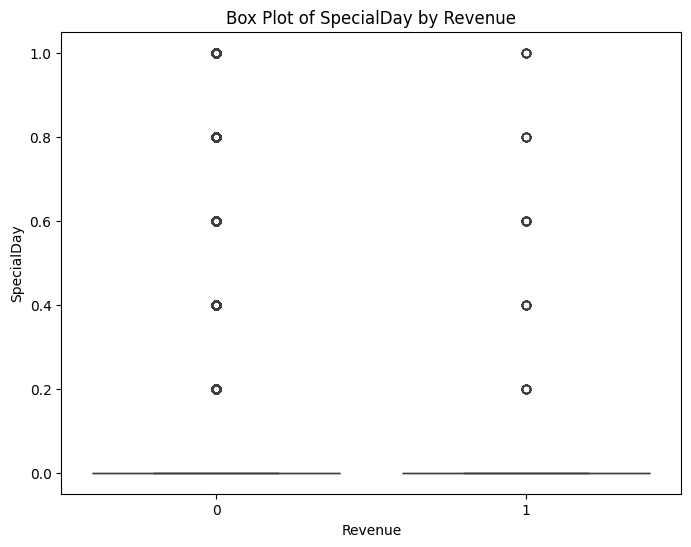

Point Biserial Correlation: -0.08230459817953284
P-value: 5.498934260228583e-20


In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Revenue_encoded', y='SpecialDay', data=data)
plt.title('Box Plot of SpecialDay by Revenue')
plt.xlabel('Revenue')
plt.ylabel('SpecialDay')
plt.show()

correlation, p_value = pointbiserialr(data['SpecialDay'], data['Revenue_encoded'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")


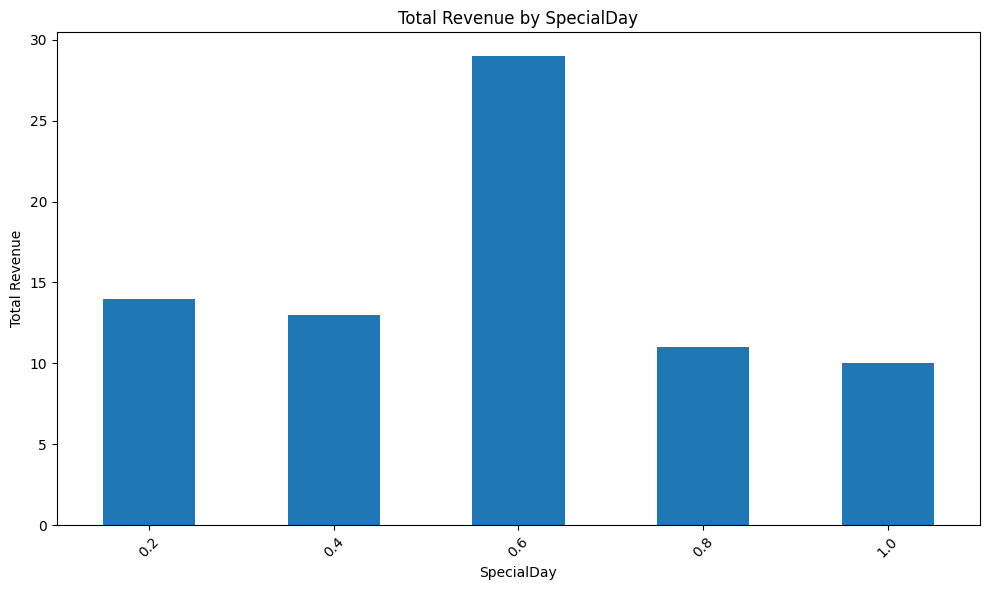

In [28]:
# Group the data by 'SpecialDay' and calculate the sum of 'Revenue' for each SpecialDay
special_day_data = data[data['SpecialDay'] != 0]
monthly_revenue = special_day_data.groupby('SpecialDay')['Revenue_encoded'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title('Total Revenue by SpecialDay')
plt.xlabel('SpecialDay')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
#Month (Month value of the year)
column_name = 'Month'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'Month': ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Data type of 'Month': object


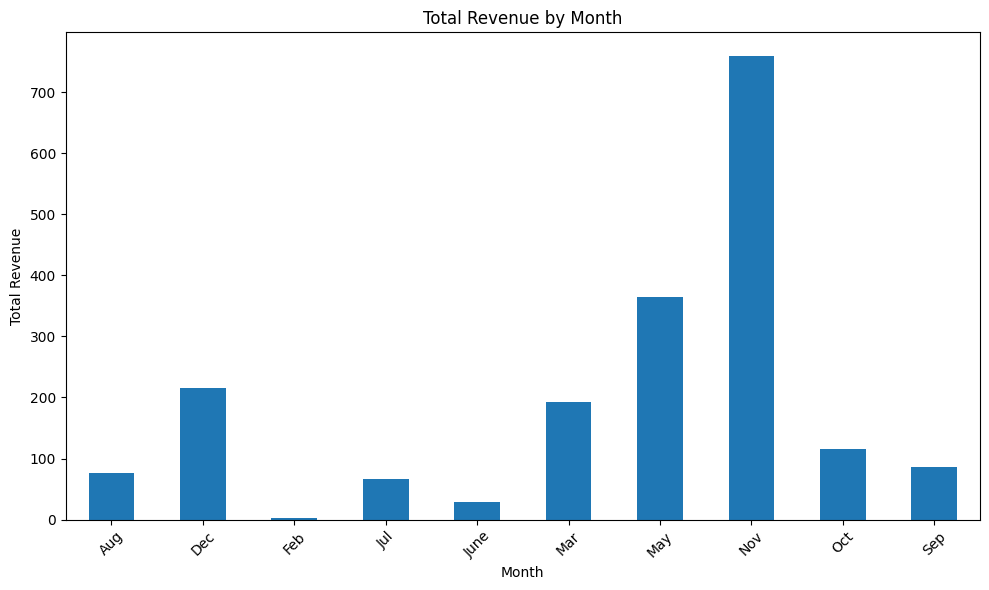

In [30]:
# Group the data by 'Month' and calculate the sum of 'Revenue' for each month
monthly_revenue = data.groupby('Month')['Revenue_encoded'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

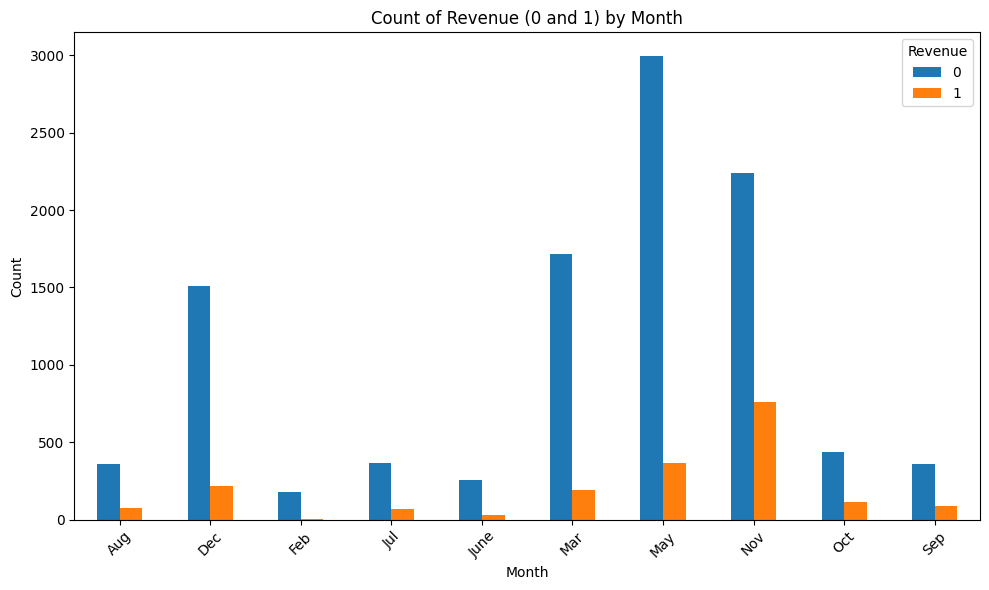

In [31]:
# Group the data by 'Month' and count the occurrences of 0 and 1 in 'Revenue'
monthly_revenue_counts = data.groupby('Month')['Revenue_encoded'].value_counts().unstack(fill_value=0)

# Create a bar plot
monthly_revenue_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Revenue (0 and 1) by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()

We drop the 'Month' column which has object values. We introduced a new column 'Month_encoded' that has integer values.

In [32]:
label_encoder = LabelEncoder()
data['Month_encoded'] = label_encoder.fit_transform(data['Month'])
column_name = 'Month_encoded'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype
print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")
data = data.drop('Month', axis=1)

Unique values in 'Month_encoded': [2 5 6 8 4 3 0 7 9 1]
Data type of 'Month_encoded': int64


In [33]:
#OperatingSystems (Operating system of the visitor)
column_name = 'OperatingSystems'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'OperatingSystems': [1 2 4 3 7 6 8 5]
Data type of 'OperatingSystems': int64


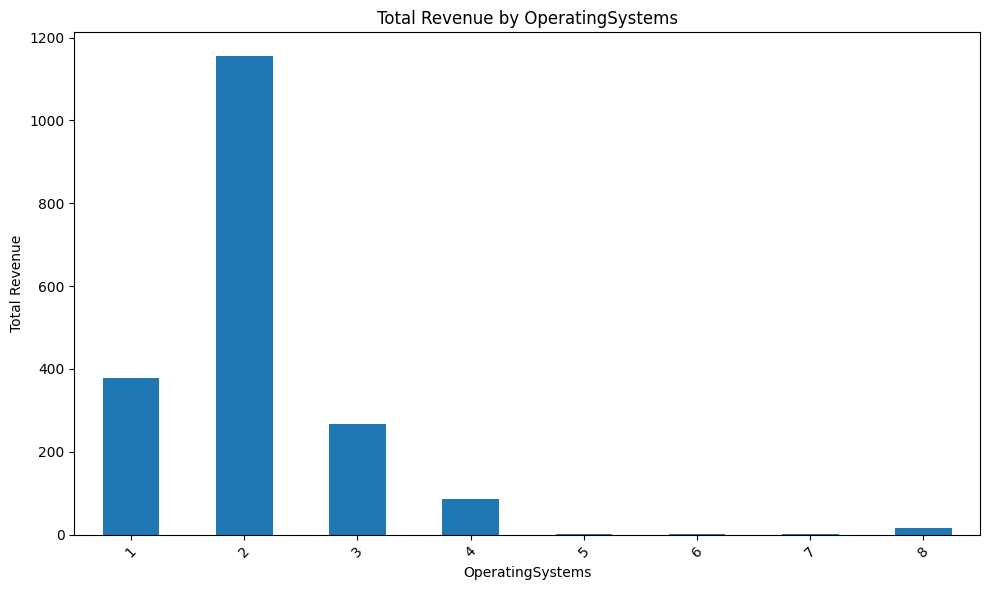

In [34]:
# Group the data by 'OperatingSystems' and calculate the sum of 'Revenue' for each OperatingSystems
monthly_revenue = data.groupby('OperatingSystems')['Revenue_encoded'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title('Total Revenue by OperatingSystems')
plt.xlabel('OperatingSystems')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

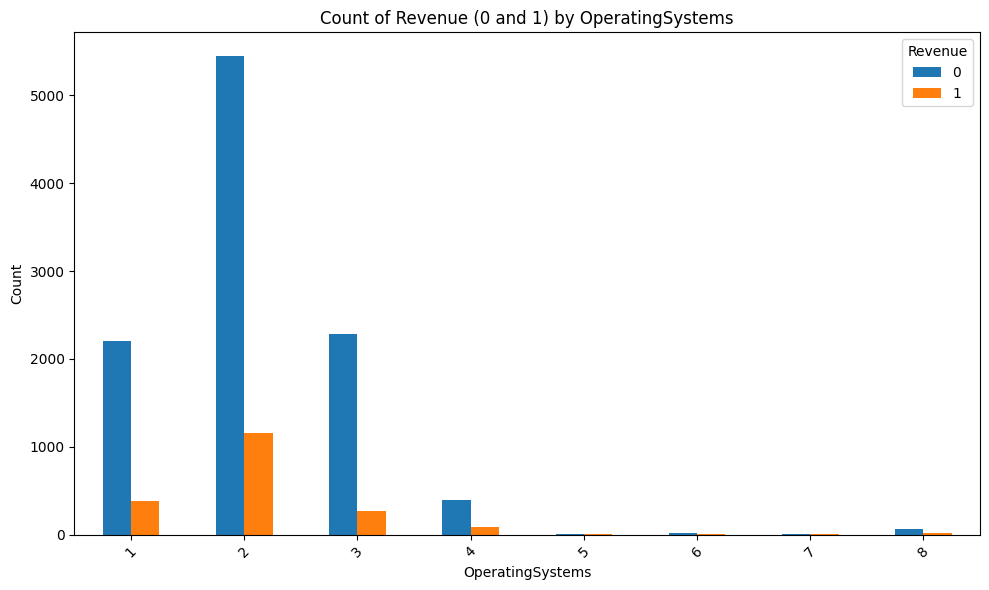

In [35]:
# Group the data by 'OperatingSystems' and count the occurrences of 0 and 1 in 'Revenue'
monthly_revenue_counts = data.groupby('OperatingSystems')['Revenue_encoded'].value_counts().unstack(fill_value=0)

# Create a bar plot
monthly_revenue_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Revenue (0 and 1) by OperatingSystems')
plt.xlabel('OperatingSystems')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()

In [36]:
#Browser (Browser of the visitor)
column_name = 'Browser'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'Browser': [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Data type of 'Browser': int64


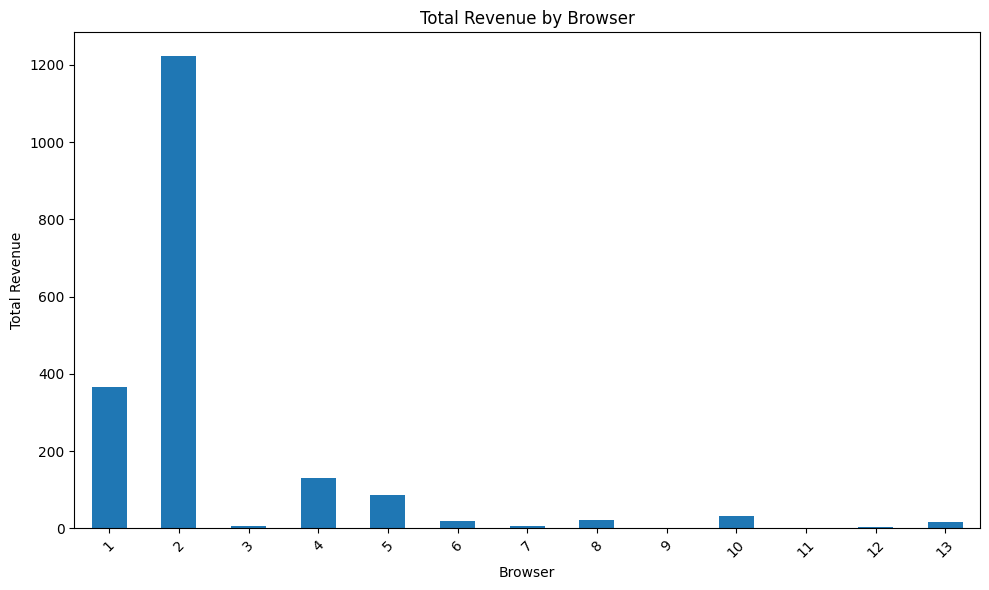

In [37]:
# Group the data by 'Browser' and calculate the sum of 'Revenue' for each Browser
monthly_revenue = data.groupby('Browser')['Revenue_encoded'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title('Total Revenue by Browser')
plt.xlabel('Browser')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

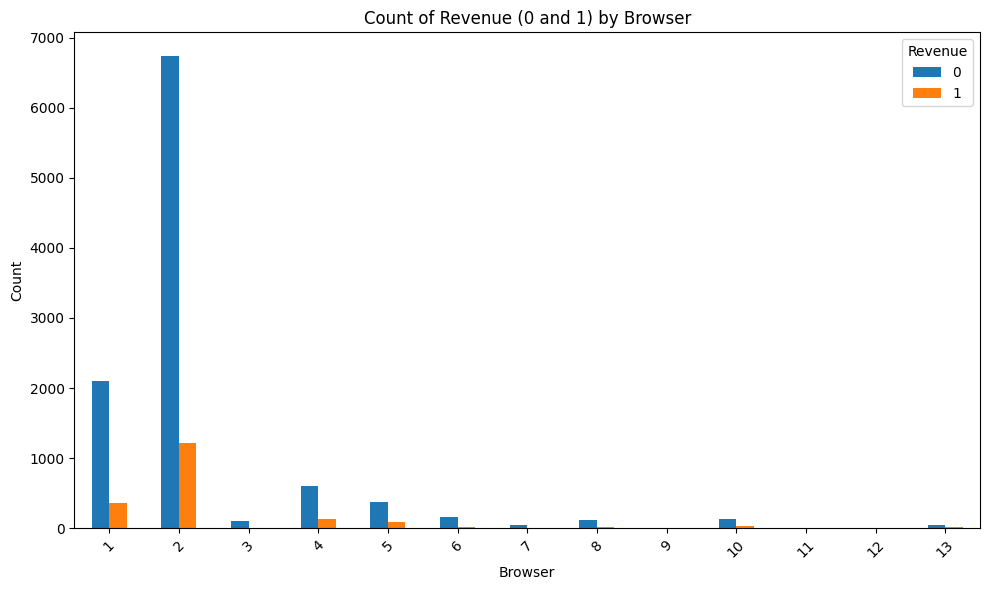

In [38]:
# Group the data by 'Browser' and count the occurrences of 0 and 1 in 'Revenue'
browser_revenue_counts = data.groupby('Browser')['Revenue_encoded'].value_counts().unstack(fill_value=0)

# Create a bar plot
browser_revenue_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Revenue (0 and 1) by Browser')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()

In [39]:
#Region (Geographical region from which the session has been started by the visitor)
column_name = 'Region'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'Region': [1 9 2 3 4 5 6 7 8]
Data type of 'Region': int64


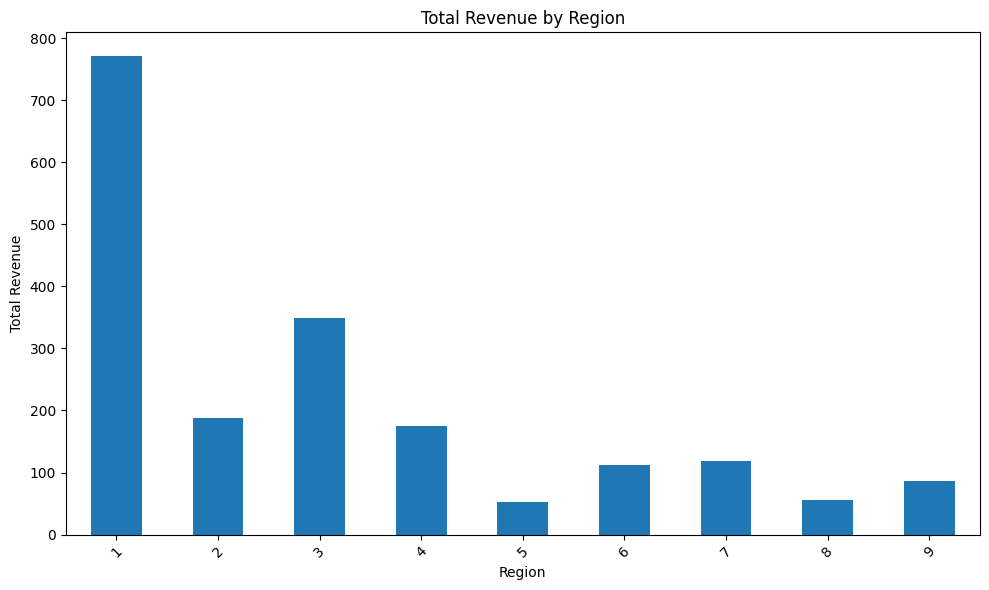

In [40]:
# Group the data by 'Region' and calculate the sum of 'Revenue' for each Region
monthly_revenue = data.groupby('Region')['Revenue_encoded'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

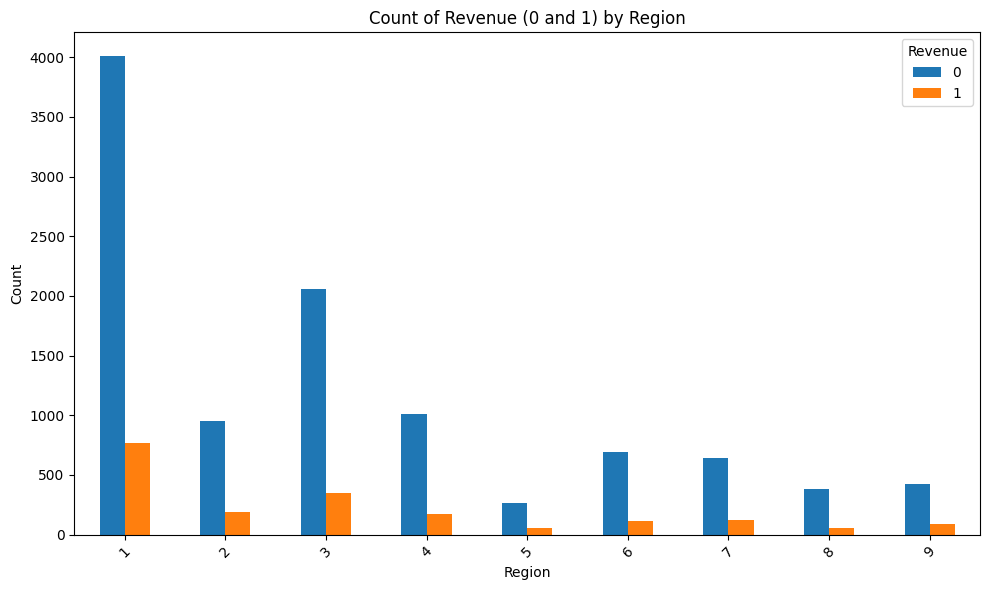

In [41]:
# Group the data by 'Region' and count the occurrences of 0 and 1 in 'Revenue'
region_revenue_counts = data.groupby('Region')['Revenue_encoded'].value_counts().unstack(fill_value=0)

# Create a bar plot
region_revenue_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Revenue (0 and 1) by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()

In [42]:
#VisitorType (New or Returning visitor)
column_name = 'VisitorType'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'VisitorType': ['Returning_Visitor' 'New_Visitor' 'Other']
Data type of 'VisitorType': object


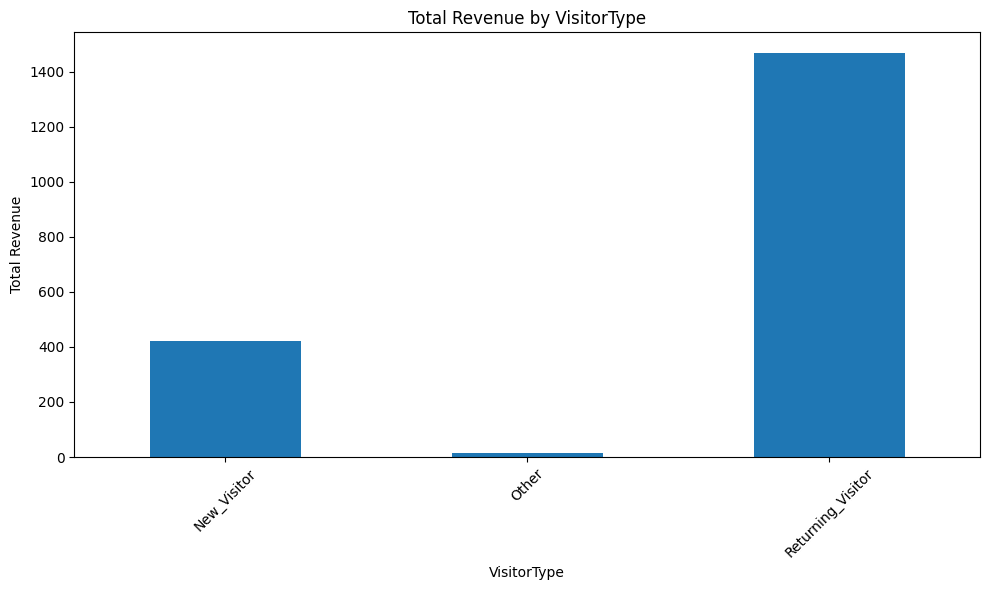

In [43]:
# Group the data by 'VisitorType' and calculate the sum of 'Revenue' for each VisitorType
monthly_revenue = data.groupby('VisitorType')['Revenue_encoded'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title('Total Revenue by VisitorType')
plt.xlabel('VisitorType')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

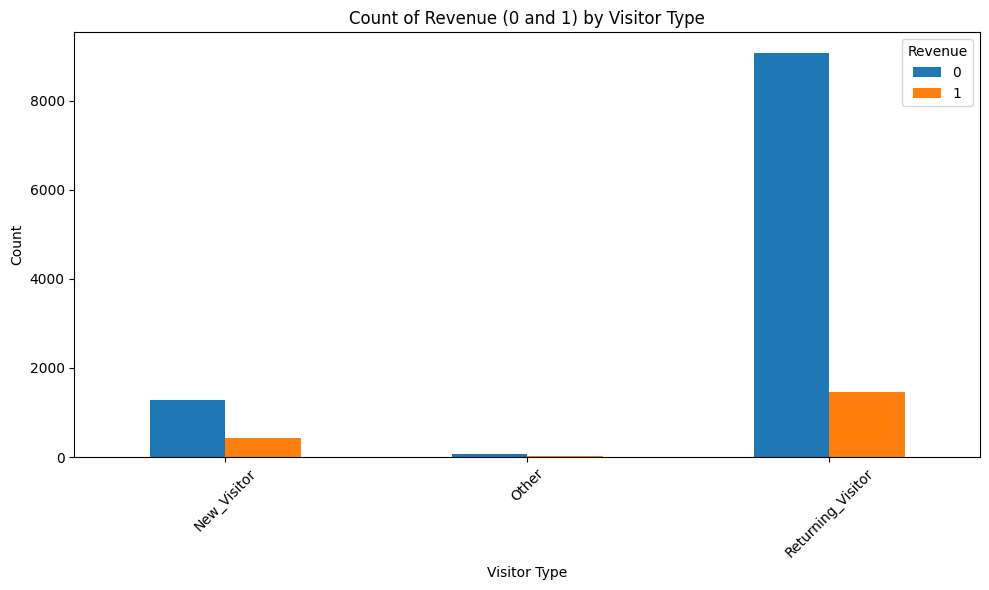

In [44]:
# Group the data by 'VisitorType_encoded' and count the occurrences of 0 and 1 in 'Revenue'
visitor_type_revenue_counts = data.groupby('VisitorType')['Revenue_encoded'].value_counts().unstack(fill_value=0)

# Create a bar plot
visitor_type_revenue_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Revenue (0 and 1) by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()

We drop the 'VisitorType' column which has object values. We introduced a new column 'VisitorType_encoded' that has integer values.

In [45]:
label_encoder = LabelEncoder()
data['VisitorType_encoded'] = label_encoder.fit_transform(data['VisitorType'])
column_name = 'VisitorType_encoded'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype
print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")
data = data.drop('VisitorType', axis=1)

Unique values in 'VisitorType_encoded': [2 0 1]
Data type of 'VisitorType_encoded': int64


In [46]:
#Weekend (Boolean value indicating if the visit is on a weekend)
column_name = 'Weekend'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype

print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")

Unique values in 'Weekend': [False  True]
Data type of 'Weekend': bool


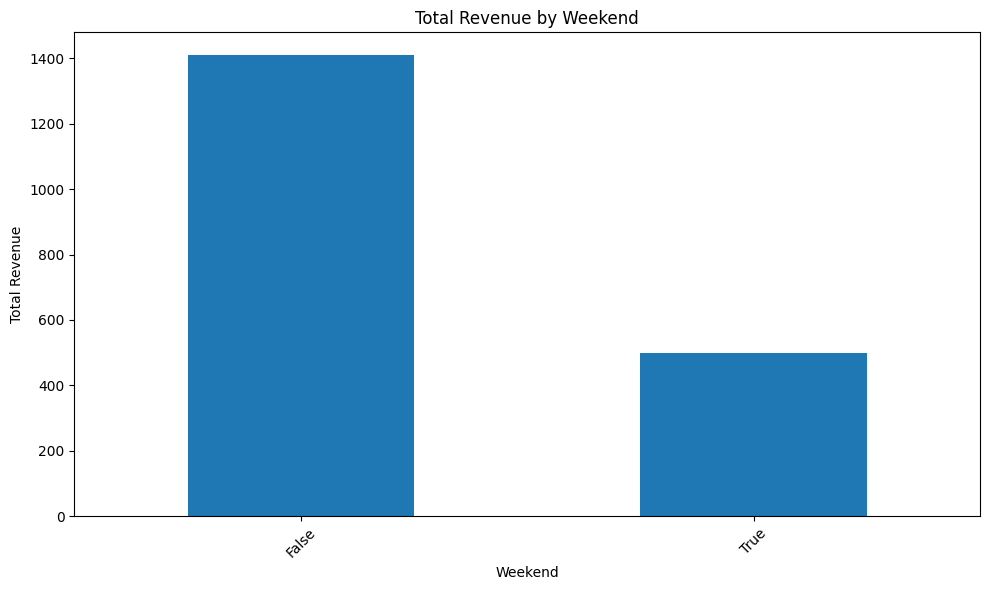

In [47]:
# Group the data by 'Weekend' and calculate the sum of 'Revenue' for each Weekend
monthly_revenue = data.groupby('Weekend')['Revenue_encoded'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar')
plt.title('Total Revenue by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

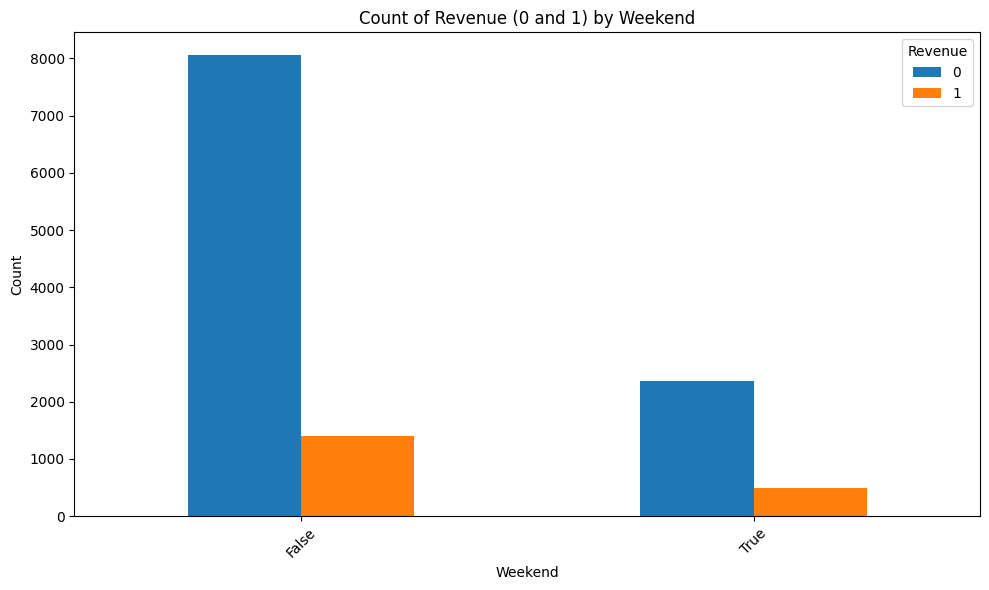

In [48]:
# Group the data by 'Weekend' and count the occurrences of 0 and 1 in 'Revenue'
visitor_type_revenue_counts = data.groupby('Weekend')['Revenue_encoded'].value_counts().unstack(fill_value=0)

# Create a bar plot
visitor_type_revenue_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Revenue (0 and 1) by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()

We drop the 'Weekend' column which has object values. We introduced a new column 'Weekend_encoded' that has integer values.

In [49]:
label_encoder = LabelEncoder()
data['Weekend_encoded'] = label_encoder.fit_transform(data['Weekend'])
column_name = 'Weekend_encoded'
unique_values = data[column_name].unique()
data_type = data[column_name].dtype
print(f"Unique values in '{column_name}': {unique_values}")
print(f"Data type of '{column_name}': {data_type}")
data = data.drop('Weekend', axis=1)

Unique values in 'Weekend_encoded': [0 1]
Data type of 'Weekend_encoded': int64


In [50]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  Revenue_encoded       

### * Identify correlations between variables.

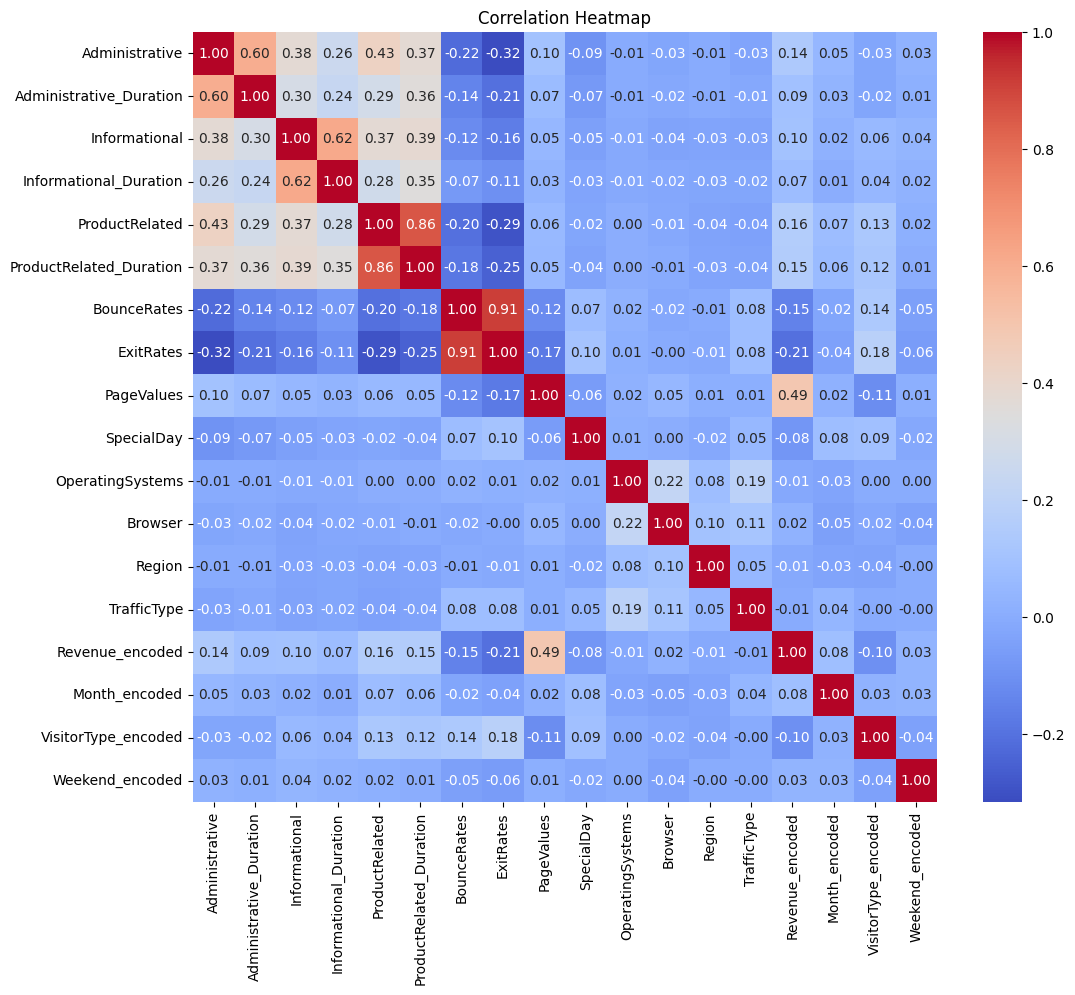

In [51]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##2. Data Preprocessing:

* Handle missing values.

* Encode categorical variables.

* Normalize/standardize numerical features.

###Handle missing values

In [52]:
#Handle missing values.
data.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


Luckily we dont have any missing values.

###Encode categorical variables

Already done that on previous part.

In [53]:
#Encode categorical variables.
data.nunique()

,0
Administrative,27
Administrative_Duration,3335
Informational,17
Informational_Duration,1258
ProductRelated,311
ProductRelated_Duration,9551
BounceRates,1872
ExitRates,4777
PageValues,2704
SpecialDay,6


###Normalize/standardize numerical features.

Already done that on previous part.

##3. Feature Engineering:

* Create new features based on existing data.

* Select important features using techniques like correlation matrix and feature importance from models.


### Create new features based on existing data.

Calculating 'TotalPagesVisited','TotalDuration'rather than using 6 different columns might be better. I will also introduce new columns indicating whether it is near SpecialDay.


In [54]:
# Creating new features
data2=data
data2['TotalPagesVisited'] = data['Administrative'] + data['Informational'] + data['ProductRelated']
data2['TotalDuration'] = data['Administrative_Duration'] + data['Informational_Duration'] + data['ProductRelated_Duration']


data2['IsSpecialDay'] = data['SpecialDay'].apply(lambda x: 1 if x > 0 else 0)


# Handling potential divisions by zero
data2.replace([np.inf, -np.inf], 0, inplace=True)
data2.fillna(0, inplace=True)

data2 = data2.drop(['Administrative', 'Informational', 'ProductRelated','Administrative_Duration','Informational_Duration','ProductRelated_Duration','OperatingSystems','Browser','Region','TrafficType'], axis=1)

# Display the first few rows to verify the new features
print(data2.head())


   BounceRates  ExitRates  PageValues  SpecialDay  Revenue_encoded  \
0         0.20       0.20         0.0         0.0                0   
1         0.00       0.10         0.0         0.0                0   
2         0.20       0.20         0.0         0.0                0   
3         0.05       0.14         0.0         0.0                0   
4         0.02       0.05         0.0         0.0                0   

   Month_encoded  VisitorType_encoded  Weekend_encoded  TotalPagesVisited  \
0              2                    2                0                  1   
1              2                    2                0                  2   
2              2                    2                0                  1   
3              2                    2                0                  2   
4              2                    2                1                 10   

   TotalDuration  IsSpecialDay  
0       0.000000             0  
1      64.000000             0  
2       0.000000 

### Select important features using techniques like correlation matrix and feature importance from models.

'OperatingSystems','Browser','Region','TrafficType' columns are also deleted since their correlation to 'Revenue' is negligible. This will help us in terms of computing times.

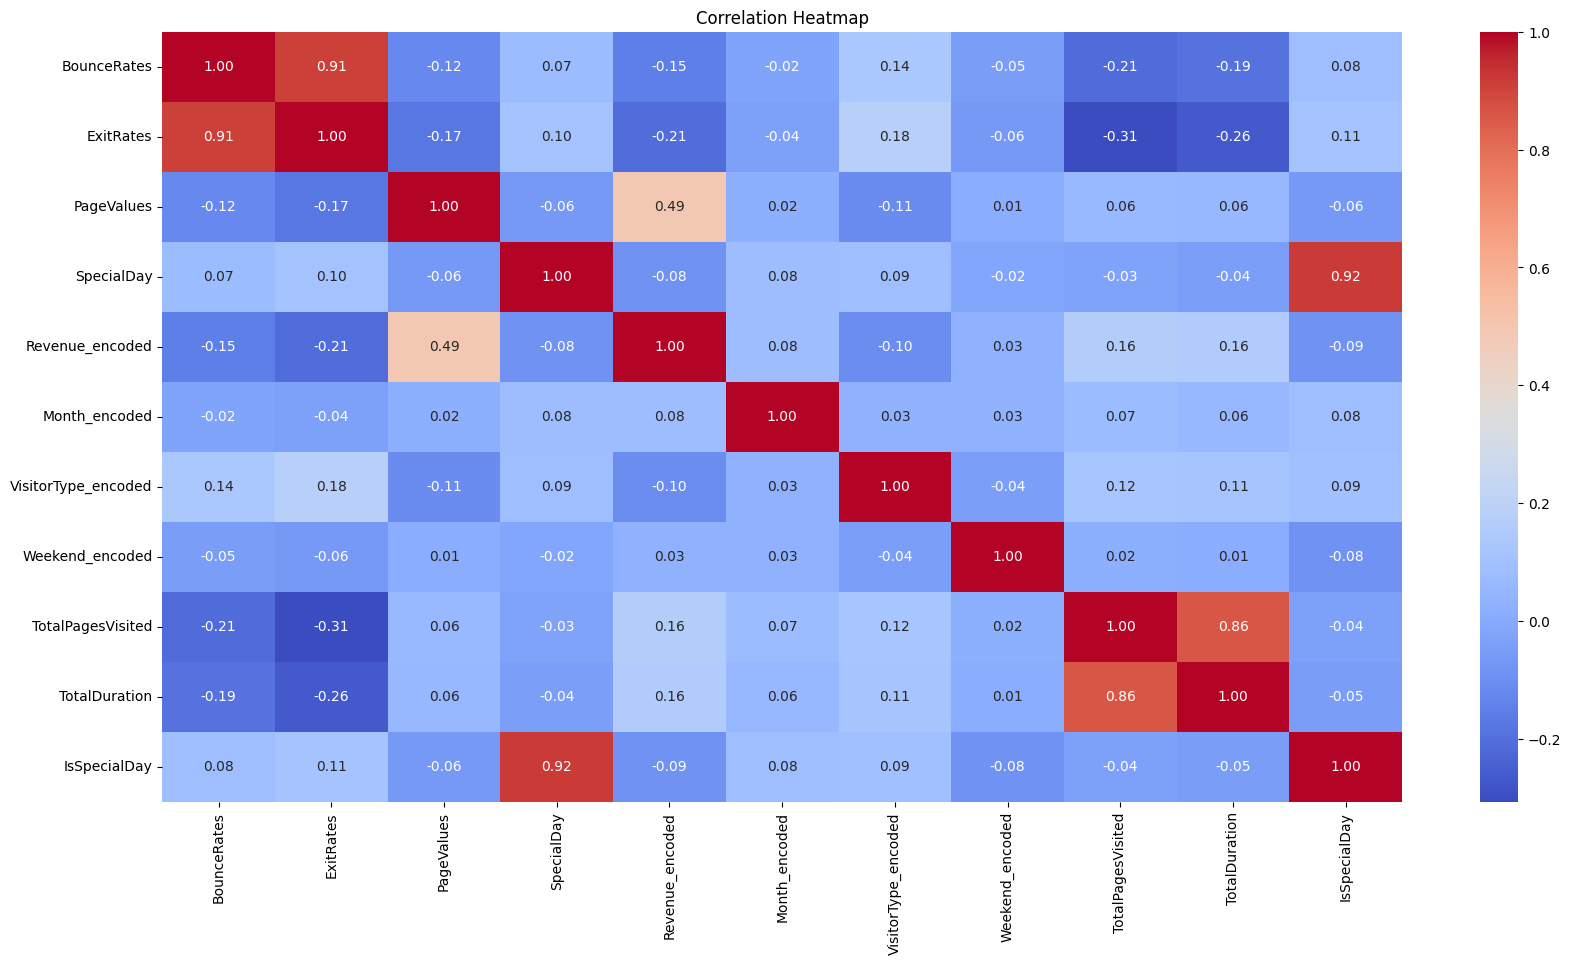

In [55]:
# Calculate the correlation matrix
correlation_matrix = data2.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##4. Model Building:

* Split the dataset into training and testing sets.

* Train multiple models (e.g., Logistic Regression, Decision Trees, Random Forest, SVM,
etc.).

* Evaluate model performance using appropriate metrics (e.g., accuracy, precision, recall,
F1-score, ROC-AUC).

###Split the dataset into training and testing sets.

In [56]:
X = data2.drop('Revenue_encoded', axis=1)  # Features
y = data2['Revenue_encoded']  # Target variable

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Train multiple models (e.g., Logistic Regression, Decision Trees, Random Forest, SVM, etc.)

####Logistic Regression

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

####Decision Trees

In [59]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

####Random Forest

In [60]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

####SVM

In [61]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

###Evaluate model performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC)

####Logistic Regression

In [62]:
y_pred = model.predict(X_test)

In [63]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# ROC-AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.73      0.34      0.46       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.69      2466
weighted avg       0.85      0.87      0.85      2466

[[2002   53]
 [ 271  140]]
ROC-AUC Score: 0.8886805074561481


####Decision Trees

In [64]:
# Generate predictions
y_pred_tree = tree_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_tree))

# Confusion matrix
print(confusion_matrix(y_test, y_pred_tree))

# ROC-AUC score
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
print("ROC-AUC Score:", roc_auc_tree)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2055
           1       0.54      0.56      0.55       411

    accuracy                           0.85      2466
   macro avg       0.72      0.73      0.73      2466
weighted avg       0.85      0.85      0.85      2466

[[1856  199]
 [ 182  229]]
ROC-AUC Score: 0.7296316029386517


####Random Forest

In [65]:
# Generate predictions
y_pred_rf = rf_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

# ROC-AUC score
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC-AUC Score:", roc_auc_rf)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.75      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.89      0.89      2466

[[1981   74]
 [ 186  225]]
ROC-AUC Score: 0.9190272375844328


####SVM

In [66]:
# Generate predictions
y_pred_svm = svm_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print(confusion_matrix(y_test, y_pred_svm))

# ROC-AUC score
# For SVM, you might need to use decision_function instead of predict_proba
y_pred_decision_svm = svm_model.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_decision_svm)
print("ROC-AUC Score:", roc_auc_svm)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2055
           1       1.00      0.01      0.02       411

    accuracy                           0.83      2466
   macro avg       0.92      0.50      0.46      2466
weighted avg       0.86      0.83      0.76      2466

[[2055    0]
 [ 407    4]]
ROC-AUC Score: 0.8193108020909183


##5. Model Optimization:

 * Perform hyperparameter tuning.
 * Use cross-validation to ensure model generalizability.


###Perform hyperparameter tuning

####Logistic Regression

In [67]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.74      0.35      0.48       411

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466

ROC-AUC Score: 0.8886805074561481


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


####Decision Trees

In [68]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.74      0.50      0.60       411

    accuracy                           0.89      2466
   macro avg       0.83      0.73      0.77      2466
weighted avg       0.88      0.89      0.88      2466

ROC-AUC Score: 0.9178018126816678


####Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

###Use cross-validation to ensure model generalizability

####Logistic Regression

In [ ]:
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

####Decision Trees


In [ ]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

####Random Forest

In [ ]:
model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

####SVM

In [ ]:
model = SVC()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

##6. Insights and Conclusion:

* Interpret the results of the analysis and model.

* Provide actionable insights based on the findings.

* Discuss limitations and potential improvements.

###Interpret the results of the analysis and model

Before applying hyperparameter tuning and cross validation ROC-AUC Scores of various models are:

*   0.8886 for Logistic Regression,
*   0.7201 for Decision Tree,
*   0.9155 for Random Forest,
*   0.8193 for SVM.


Since Random forests combine multiple decision trees, each trained on a different subset of the data and features; this averaging over multiple trees reduces overfitting, which is a common problem with individual decision trees, leading to better generalization to new data. Overall Random forests are less sensitive to outliers compared to some other algorithms. These features probably resulted with a higher ROC-AUC Score.








After using hyperparameter tuning, ROC-AUC scores of varios models are:

*   0.8886 for Logistic Regression,
*   0.9178 for Decision Tree,
*   0.9247 for Random Forest,






###Provide actionable insights based on the findings

####Focus on Product-Related Metrics:
The strong correlation between ProductRelated_Duration, PageValues, and Revenue suggests that users who spend more time on product pages and have higher average page values are more likely to make a purchase according to correlation matrix.

* Improving Product Page Engagement: Invest in high-quality product images, detailed descriptions, and interactive elements to keep users engaged.

* Personalization: Implement product recommendations based on user browsing history to guide them towards relevant items and increase page value.

####Optimize for Special Days and Peak Months:
The analysis shows a clear spike in revenue during special days and specific months (like November).

* Targeted Campaigns: Plan marketing campaigns and promotions around these peak periods to maximize conversion rates.

* Inventory Management: Ensure sufficient stock levels of popular products during these times to avoid missed sales opportunities.

####Address High Bounce and Exit Rates:
The negative correlation between BounceRates, ExitRates, and Revenue indicates a potential for improvement.

* Website Usability: Conduct A/B testing to optimize website navigation, page load speed, and overall user experience.

* Targeted Content: Ensure that landing pages are relevant to the user's search intent and provide clear calls to action.

####Model Selection:

 While Random Forest performed well,  deploying the Decision Tree model after hyperparameter tuning worth considering. It achieved a comparable ROC AUC score (0.9178) and offers better interpretability, allowing you to understand the decision-making process and extract further insights.

###Discuss limitations and potential improvements.

Incorporating external data sources like weather, economic indicators, or social media trends that might influence purchasing behavior may be beneficial.


Eventhough, several models are explored, there are other algorithms worth considering. Try different models that can outperform the models that are used.

Regularly monitoring website analytics and model performance to identify areas for further improvement and adapt your strategies accordingly is salient.